## IPO Dataset: Logistic Regression
- Binary classification model
- Goal: predict whether opening day price change from open to close for an IPO exceeds given threshold %
- by Paul H.

### Data Import and Cleaning

In [261]:
#initial public offering dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ipo_scoop.csv', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], skiprows=2, names=['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price', 'first_day_close', 'first_day_pctchg', 'dollar_change_open', 'dollar_change_close', 'star_rating', 'performed'])

In [3]:
#drop rows that contain all NA's
df.dropna(axis=0, how='all', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3123 entries, 0 to 3122
Data columns (total 12 columns):
date                   3123 non-null object
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null object
open_price             3123 non-null object
first_day_close        3123 non-null object
first_day_pctchg       3123 non-null object
dollar_change_open     3123 non-null object
dollar_change_close    3123 non-null object
star_rating            3123 non-null object
performed              357 non-null object
dtypes: object(12)
memory usage: 317.2+ KB


In [5]:
df.head() 

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,$4.00,$4.40,$6.18,54.50%,$0.40,$2.18,N/C,NaN
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,$4.00,$5.51,$5.56,39.00%,$1.51,$1.56,1,Missed
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,$4.00,$5.20,$4.62,15.50%,$1.20,$0.62,N/C,NaN
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,$5.00,$5.00,$4.38,-12.40%,$0.00,-$0.62,1,NaN
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,$5.00,$5.55,$4.88,-2.40%,$0.55,-$0.12,1,NaN


In [6]:
#Clean data: convert everything to numbers: remove $ signs, etc
df = df.applymap(lambda x: x if not '$' in str(x) else x.replace('$', ''))

In [7]:
df = df.applymap(lambda x: x if not '%' in str(x) else x.replace('%', ''))

In [8]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,54.50,0.40,2.18,N/C,NaN
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,4.00,5.51,5.56,39.00,1.51,1.56,1,Missed
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,4.00,5.20,4.62,15.50,1.20,0.62,N/C,NaN
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.00,5.00,4.38,-12.40,0.00,-0.62,1,NaN
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,5.00,5.55,4.88,-2.40,0.55,-0.12,1,NaN


In [9]:
#Convert dates to datetime format
#df.date = pd.to_datetime(df.date) # throws error indicating the corrupt date

In [10]:
df[df['date'] == '11/120'] #this should be Nov-20, fix it

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed
1258,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.00,17.00,18.40,15.00,1.00,2.40,1,NaN


In [11]:
df.loc[1258, 'date'] = '2012-11-20'

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3123 entries, 0 to 3122
Data columns (total 12 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null object
open_price             3123 non-null object
first_day_close        3123 non-null object
first_day_pctchg       3123 non-null object
dollar_change_open     3123 non-null object
dollar_change_close    3123 non-null object
star_rating            3123 non-null object
performed              357 non-null object
dtypes: datetime64[ns](1), object(11)
memory usage: 397.2+ KB


In [14]:
df['offer_price'] = df['offer_price'].astype('float')

In [15]:
df['open_price'] = df['open_price'].astype('float')
df['first_day_close'] = df['first_day_close'].astype('float')

In [16]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed'],
      dtype='object')

In [17]:
df.replace('N/C', 0, inplace=True)

In [18]:
#convert everything to numbers
for col in df.columns[4:11]:
    df[col] = df[col].astype('float')

In [19]:
#do more cleaning, some data looks corrupt
df['dollar_change_close'] = df.first_day_close - df.offer_price
df['dollar_change_open'] = df.open_price - df.offer_price
df['first_day_pctchg'] = (df.dollar_change_close / df.offer_price) * 100

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3123 entries, 0 to 3122
Data columns (total 12 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null float64
open_price             3123 non-null float64
first_day_close        3123 non-null float64
first_day_pctchg       3123 non-null float64
dollar_change_open     3123 non-null float64
dollar_change_close    3123 non-null float64
star_rating            3123 non-null float64
performed              357 non-null object
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 397.2+ KB


### EDA & Feature Engineering

In [21]:
#avg pct change on IPO day
df.groupby(df.date.dt.year)['first_day_pctchg'].mean()

date
2000    35.571613
2001    12.761385
2002     7.231533
2003    11.945106
2004    10.703301
2005     9.911079
2006     9.988616
2007    11.521496
2008     2.318174
2009     7.175558
2010     8.654902
2011     9.044531
2012    11.981650
2013    16.353141
2014    12.363209
2015    13.947164
2016    10.979816
2017    10.537344
2018    14.417572
Name: first_day_pctchg, dtype: float64

In [22]:
mean_year_first = df.groupby(df.date.dt.year)['first_day_pctchg'].mean()

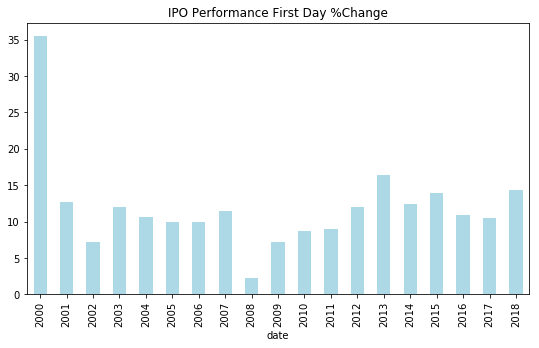

In [23]:
%matplotlib inline
mean_year_first.plot(kind = 'bar', color = 'lightblue', figsize = (9, 5), title = 'IPO Performance First Day %Change')

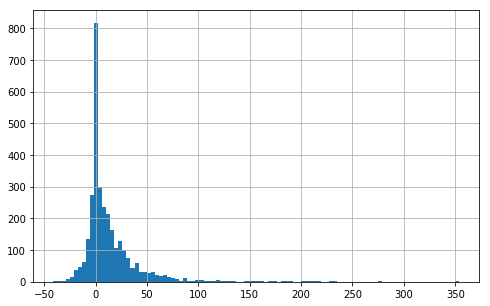

In [24]:
#data is skewed (long tail)
df.first_day_pctchg.hist(bins = 100, figsize = (8, 5))

In [25]:
#make new columns
df['dollar_chg_opencls'] = df['first_day_close'] - df['open_price']
df['pct_chg_opencls'] = (df['dollar_chg_opencls']/df['open_price']) * 100
# = pct change on IPO day from the open price, not the offer price

In [26]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072


In [27]:
df.pct_chg_opencls.describe() 

count    3123.000000
mean        1.336246
std        10.726671
min       -49.281222
25%        -2.880558
50%         0.000000
75%         4.000000
max       159.417476
Name: pct_chg_opencls, dtype: float64

In [28]:
#sort on date, and change index to date
df.sort_values('date', inplace = True)
df.set_index(keys='date', drop=False, inplace=True)

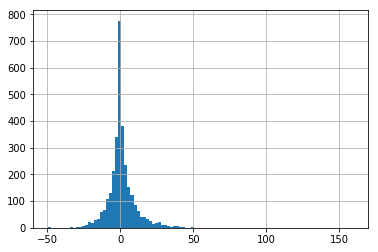

In [29]:
#pct_chg_opencls looks more symmetric, with few outliers
df.pct_chg_opencls.hist(bins= 100)

In [30]:
df.pct_chg_opencls.describe()

count    3123.000000
mean        1.336246
std        10.726671
min       -49.281222
25%        -2.880558
50%         0.000000
75%         4.000000
max       159.417476
Name: pct_chg_opencls, dtype: float64

In [31]:
#new feature = gap at open / offer price
df['gap_open_pct'] = (df['dollar_change_open']/df['offer_price'])*100

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3123 entries, 2000-05-12 to 2018-08-10
Data columns (total 15 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null float64
open_price             3123 non-null float64
first_day_close        3123 non-null float64
first_day_pctchg       3123 non-null float64
dollar_change_open     3123 non-null float64
dollar_change_close    3123 non-null float64
star_rating            3123 non-null float64
performed              357 non-null object
dollar_chg_opencls     3123 non-null float64
pct_chg_opencls        3123 non-null float64
gap_open_pct           3123 non-null float64
dtypes: datetime64[ns](1), float64(10), object(4)
memory usage: 470.4+ KB


#### Add S&P500 performance as new feature

In [33]:
sp = pd.read_csv('SPY.csv')

In [34]:
sp.sort_values('Date', inplace = True)
sp.reset_index(drop= True, inplace = True)

In [35]:
#column names
sp.rename(columns={"Adj Close":"Adj_Close"}, inplace=True)

In [36]:
sp.head(10)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000-01-03,148.250000,148.250000,143.875000,145.437500,102.930847,8164300
1,2000-01-04,143.531204,144.062500,139.640594,139.750000,98.905685,8089800
2,2000-01-05,139.937500,141.531204,137.250000,140.000000,99.082603,12177900
3,2000-01-06,139.625000,141.500000,137.750000,137.750000,97.490211,6227200
4,2000-01-07,140.312500,145.750000,140.062500,145.750000,103.152069,8066500
5,2000-01-10,146.250000,146.906204,145.031204,146.250000,103.505920,5741700
6,2000-01-11,145.812500,146.093704,143.500000,144.500000,102.267410,7503700
7,2000-01-12,144.593704,144.593704,142.875000,143.062500,101.249992,6907700
8,2000-01-13,144.468704,145.750000,143.281204,145.000000,102.621277,5158300
9,2000-01-14,146.531204,147.468704,145.968704,146.968704,104.014618,7437300


In [37]:
sp['day_ago'] = sp.Date.shift(periods=1)
sp['week_ago'] = sp.Date.shift(periods = 6) # 5 trading days in week

In [38]:
sp.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,day_ago,week_ago
0,2000-01-03,148.250000,148.250000,143.875000,145.4375,102.930847,8164300,NaN,NaN
1,2000-01-04,143.531204,144.062500,139.640594,139.7500,98.905685,8089800,2000-01-03,NaN
2,2000-01-05,139.937500,141.531204,137.250000,140.0000,99.082603,12177900,2000-01-04,NaN
3,2000-01-06,139.625000,141.500000,137.750000,137.7500,97.490211,6227200,2000-01-05,NaN
4,2000-01-07,140.312500,145.750000,140.062500,145.7500,103.152069,8066500,2000-01-06,NaN


In [39]:
sp['day_ago_close'] = sp.Adj_Close.shift(periods = 1)

In [40]:
sp['week_ago_close'] = sp.Adj_Close.shift(periods = 6)

In [41]:
sp.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,day_ago,week_ago,day_ago_close,week_ago_close
0,2000-01-03,148.250000,148.250000,143.875000,145.4375,102.930847,8164300,NaN,NaN,NaN,NaN
1,2000-01-04,143.531204,144.062500,139.640594,139.7500,98.905685,8089800,2000-01-03,NaN,102.930847,NaN
2,2000-01-05,139.937500,141.531204,137.250000,140.0000,99.082603,12177900,2000-01-04,NaN,98.905685,NaN
3,2000-01-06,139.625000,141.500000,137.750000,137.7500,97.490211,6227200,2000-01-05,NaN,99.082603,NaN
4,2000-01-07,140.312500,145.750000,140.062500,145.7500,103.152069,8066500,2000-01-06,NaN,97.490211,NaN


In [42]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 11 columns):
Date              4688 non-null object
Open              4688 non-null float64
High              4688 non-null float64
Low               4688 non-null float64
Close             4688 non-null float64
Adj_Close         4688 non-null float64
Volume            4688 non-null int64
day_ago           4687 non-null object
week_ago          4682 non-null object
day_ago_close     4687 non-null float64
week_ago_close    4682 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 403.0+ KB


In [43]:
#sp500 weekly pct chg
sp['chg'] = ((sp.day_ago_close - sp.week_ago_close)/sp.week_ago_close) * 100

In [44]:
sp.chg.describe()

count    4682.000000
mean        0.141077
std         2.441077
min       -19.793362
25%        -1.002636
50%         0.293729
75%         1.431990
max        19.403586
Name: chg, dtype: float64

In [45]:
#convert to datetime format and change index
sp.Date = pd.to_datetime(sp.Date)
sp.set_index(keys='Date', drop=True, inplace=True)

In [46]:
sp.head(10)

,Open,High,Low,Close,Adj_Close,Volume,day_ago,week_ago,day_ago_close,week_ago_close,chg
Date,,,,,,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,102.930847,8164300,NaN,NaN,NaN,NaN,NaN
2000-01-04,143.531204,144.062500,139.640594,139.750000,98.905685,8089800,2000-01-03,NaN,102.930847,NaN,NaN
2000-01-05,139.937500,141.531204,137.250000,140.000000,99.082603,12177900,2000-01-04,NaN,98.905685,NaN,NaN
2000-01-06,139.625000,141.500000,137.750000,137.750000,97.490211,6227200,2000-01-05,NaN,99.082603,NaN,NaN
2000-01-07,140.312500,145.750000,140.062500,145.750000,103.152069,8066500,2000-01-06,NaN,97.490211,NaN,NaN
2000-01-10,146.250000,146.906204,145.031204,146.250000,103.505920,5741700,2000-01-07,NaN,103.152069,NaN,NaN
2000-01-11,145.812500,146.093704,143.500000,144.500000,102.267410,7503700,2000-01-10,2000-01-03,103.505920,102.930847,0.558698
2000-01-12,144.593704,144.593704,142.875000,143.062500,101.249992,6907700,2000-01-11,2000-01-04,102.267410,98.905685,3.398920
2000-01-13,144.468704,145.750000,143.281204,145.000000,102.621277,5158300,2000-01-12,2000-01-05,101.249992,99.082603,2.187457


In [47]:
#Join by date
df['sp_chg_pct_week'] = sp.chg

In [48]:
#there are missing S&P500 dates
df['sp_chg_pct_week'].isnull().sum()

4

In [49]:
#fill missing S&P data with the preceding value
df.fillna(method='ffill', inplace=True)

In [50]:
df['sp_chg_pct_week'].describe()

count    3123.000000
mean        0.086310
std         1.843367
min       -11.001044
25%        -0.931455
50%         0.231187
75%         1.215254
max        10.364580
Name: sp_chg_pct_week, dtype: float64

In [51]:
df.head(10)

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,gap_open_pct,sp_chg_pct_week
date,,,,,,,,,,,,,,,,
2000-05-12,2000-05-12,Sequoia Software,SQSW,Lehman Brothers,8.0,10.25,10.06,25.750000,2.25,2.06,2.0,NaN,-0.19,-1.853659,28.125000,-0.374697
2000-05-18,2000-05-18,US Unwired,UNWR,Donaldson Lufkin & Jenrette,11.0,11.03,11.06,0.545455,0.03,0.06,1.0,NaN,0.03,0.271985,0.272727,5.090497
2000-05-18,2000-05-18,Nogatech,NGTC,W.R. Hambrecht+Co,12.0,11.88,9.41,-21.583333,-0.12,-2.59,1.0,NaN,-2.47,-20.791246,-1.000000,5.090497
2000-05-18,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20.0,40.00,51.00,155.000000,20.00,31.00,3.0,NaN,11.00,27.500000,100.000000,5.090497
2000-05-18,2000-05-18,iBEAM Broadcasting,IBEM,Morgan Stanley Dean Witter,10.0,11.50,14.00,40.000000,1.50,4.00,2.0,NaN,2.50,21.739130,15.000000,5.090497
2000-05-19,2000-05-19,CoolSavings.com,CSAV,Chase H&Q,7.0,7.00,5.53,-21.000000,0.00,-1.47,1.0,NaN,-1.47,-21.000000,0.000000,1.482064
2000-05-19,2000-05-19,PixelWorks,PXLW,Salomon Smith Barney,10.0,11.25,10.89,8.900000,1.25,0.89,3.0,NaN,-0.36,-3.200000,12.500000,1.482064
2000-05-19,2000-05-19,Parthus Technologies,PRTH,"Goldman, Sachs",12.6,20.00,20.81,65.158730,7.40,8.21,3.0,NaN,0.81,4.050000,58.730159,1.482064
2000-05-23,2000-05-23,Integrated Circuit Systems,ICST,Credit Suisse First Boston,13.0,13.00,12.00,-7.692308,0.00,-1.00,1.0,NaN,-1.00,-7.692308,0.000000,-3.592132


#### SP500 peformance (in the preceding week) correlation with IPO performance
- looks weak

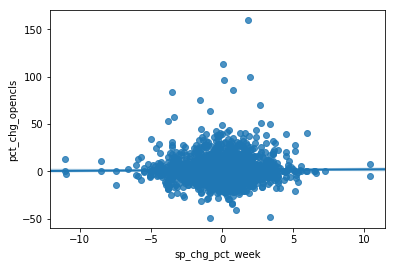

In [52]:
sns.regplot(x='sp_chg_pct_week', y='pct_chg_opencls', data=df)
#sns.regplot(x='sp_chg_pct_week', y='first_day_pctchg', data=df)
#sns.regplot(x='sp_chg_pct_week', y='dollar_change_open', data=df)

#### Categorical Features

In [53]:
df.managers[:10]

date
2000-05-12                Lehman Brothers
2000-05-18    Donaldson Lufkin & Jenrette
2000-05-18              W.R. Hambrecht+Co
2000-05-18     Credit Suisse First Boston
2000-05-18     Morgan Stanley Dean Witter
2000-05-19                      Chase H&Q
2000-05-19           Salomon Smith Barney
2000-05-19                 Goldman, Sachs
2000-05-23     Credit Suisse First Boston
2000-05-24                  Merrill Lynch
Name: managers, dtype: object

In [54]:
df['lead_mgr'] = df['managers'].astype('str').map(lambda x:x.split('/')[0])

In [55]:
df['lead_mgr'].head()

date
2000-05-12                Lehman Brothers
2000-05-18    Donaldson Lufkin & Jenrette
2000-05-18              W.R. Hambrecht+Co
2000-05-18     Credit Suisse First Boston
2000-05-18     Morgan Stanley Dean Witter
Name: lead_mgr, dtype: object

In [56]:
df.loc[df['lead_mgr'].str.contains('ViewTrade'), 'lead_mgr'] = 'viewtrade securities'

In [57]:
df['lead_mgr'].head()

date
2000-05-12                Lehman Brothers
2000-05-18    Donaldson Lufkin & Jenrette
2000-05-18              W.R. Hambrecht+Co
2000-05-18     Credit Suisse First Boston
2000-05-18     Morgan Stanley Dean Witter
Name: lead_mgr, dtype: object

In [58]:
df.lead_mgr.unique()[:5]

array(['Lehman Brothers', 'Donaldson Lufkin & Jenrette',
       'W.R. Hambrecht+Co', 'Credit Suisse First Boston',
       'Morgan Stanley Dean Witter'], dtype=object)

In [59]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'gap_open_pct', 'sp_chg_pct_week', 'lead_mgr'],
      dtype='object')

In [60]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,gap_open_pct,sp_chg_pct_week,lead_mgr
date,,,,,,,,,,,,,,,,,
2000-05-12,2000-05-12,Sequoia Software,SQSW,Lehman Brothers,8.0,10.25,10.06,25.750000,2.25,2.06,2.0,NaN,-0.19,-1.853659,28.125000,-0.374697,Lehman Brothers
2000-05-18,2000-05-18,US Unwired,UNWR,Donaldson Lufkin & Jenrette,11.0,11.03,11.06,0.545455,0.03,0.06,1.0,NaN,0.03,0.271985,0.272727,5.090497,Donaldson Lufkin & Jenrette
2000-05-18,2000-05-18,Nogatech,NGTC,W.R. Hambrecht+Co,12.0,11.88,9.41,-21.583333,-0.12,-2.59,1.0,NaN,-2.47,-20.791246,-1.000000,5.090497,W.R. Hambrecht+Co
2000-05-18,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20.0,40.00,51.00,155.000000,20.00,31.00,3.0,NaN,11.00,27.500000,100.000000,5.090497,Credit Suisse First Boston
2000-05-18,2000-05-18,iBEAM Broadcasting,IBEM,Morgan Stanley Dean Witter,10.0,11.50,14.00,40.000000,1.50,4.00,2.0,NaN,2.50,21.739130,15.000000,5.090497,Morgan Stanley Dean Witter


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3123 entries, 2000-05-12 to 2018-08-10
Data columns (total 17 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null float64
open_price             3123 non-null float64
first_day_close        3123 non-null float64
first_day_pctchg       3123 non-null float64
dollar_change_open     3123 non-null float64
dollar_change_close    3123 non-null float64
star_rating            3123 non-null float64
performed              3081 non-null object
dollar_chg_opencls     3123 non-null float64
pct_chg_opencls        3123 non-null float64
gap_open_pct           3123 non-null float64
sp_chg_pct_week        3123 non-null float64
lead_mgr               3123 non-null object
dtypes: datetime64[ns](1), float64(11), object(5)
memory usage: 519.2+ KB


In [62]:
#is IPO performance dependent on lead manager
df.groupby('lead_mgr')['pct_chg_opencls'].mean()

lead_mgr
  Morgan Stanley                                        0.212465
 Deutsche Bank Securities                               6.347898
 J.P. Morgan                                            4.732680
 Raymond James                                         11.310345
A.G. Edwards                                            2.035083
A.G. Edwards & Sons                                     5.485057
A.G. Edwrads & Sons                                     0.000000
AG Edwards                                             -2.789684
AG Edwards & Sons                                       5.597964
AG Edwrads                                              9.247312
Adams Harkness                                         -4.133333
Advest                                                 -1.593838
Aegis Capital                                           0.783463
Aegis Capital                                          -3.278689
Aegis Capital Corp                                     -0.142159
Aegis Capital Co

In [63]:
#star rating is ordinal categorical feature
df.star_rating.value_counts()

1.0    1528
3.0     782
2.0     734
4.0      62
0.0       9
5.0       8
Name: star_rating, dtype: int64

In [64]:
#performance looks correlated with star rating, except the 0 and 5 ratings look off
df.groupby('star_rating')[['pct_chg_opencls','first_day_pctchg']].mean()

,pct_chg_opencls,first_day_pctchg
star_rating,,
0.0,5.647722,39.401027
1.0,0.495960,2.399954
2.0,1.573844,12.375120
3.0,2.416812,29.281555
4.0,5.080942,66.012495
5.0,0.534018,122.319550


In [65]:
#change the 0 ratings to 5's - this is a guess
df['star_rating'] = df['star_rating'].replace(0, 5)

In [66]:
df.groupby('star_rating')[['pct_chg_opencls','first_day_pctchg']].mean()

,pct_chg_opencls,first_day_pctchg
star_rating,,
1.0,0.495960,2.399954
2.0,1.573844,12.375120
3.0,2.416812,29.281555
4.0,5.080942,66.012495
5.0,3.241273,78.421509


#### Add features for month and day

In [67]:
df['month'] = df.date.dt.month

In [68]:
df.month[:5]

date
2000-05-12    5
2000-05-18    5
2000-05-18    5
2000-05-18    5
2000-05-18    5
Name: month, dtype: int64

In [69]:
df['day'] = df.date.dt.dayofweek

In [70]:
df['day'][:5]

date
2000-05-12    4
2000-05-18    3
2000-05-18    3
2000-05-18    3
2000-05-18    3
Name: day, dtype: int64

In [71]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,gap_open_pct,sp_chg_pct_week,lead_mgr,month,day
date,,,,,,,,,,,,,,,,,,,
2000-05-12,2000-05-12,Sequoia Software,SQSW,Lehman Brothers,8.0,10.25,10.06,25.750000,2.25,2.06,2.0,NaN,-0.19,-1.853659,28.125000,-0.374697,Lehman Brothers,5,4
2000-05-18,2000-05-18,US Unwired,UNWR,Donaldson Lufkin & Jenrette,11.0,11.03,11.06,0.545455,0.03,0.06,1.0,NaN,0.03,0.271985,0.272727,5.090497,Donaldson Lufkin & Jenrette,5,3
2000-05-18,2000-05-18,Nogatech,NGTC,W.R. Hambrecht+Co,12.0,11.88,9.41,-21.583333,-0.12,-2.59,1.0,NaN,-2.47,-20.791246,-1.000000,5.090497,W.R. Hambrecht+Co,5,3
2000-05-18,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20.0,40.00,51.00,155.000000,20.00,31.00,3.0,NaN,11.00,27.500000,100.000000,5.090497,Credit Suisse First Boston,5,3
2000-05-18,2000-05-18,iBEAM Broadcasting,IBEM,Morgan Stanley Dean Witter,10.0,11.50,14.00,40.000000,1.50,4.00,2.0,NaN,2.50,21.739130,15.000000,5.090497,Morgan Stanley Dean Witter,5,3


In [72]:
df['day'] = df.day.map({1: 'mon', 2: 'tues', 3: 'weds', 4:'thurs', 5:'fri'   })

In [73]:
df['month'] = df.month.map({1: 'jan', 2: 'feb', 3: 'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'})

In [74]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,gap_open_pct,sp_chg_pct_week,lead_mgr,month,day
date,,,,,,,,,,,,,,,,,,,
2000-05-12,2000-05-12,Sequoia Software,SQSW,Lehman Brothers,8.0,10.25,10.06,25.750000,2.25,2.06,2.0,NaN,-0.19,-1.853659,28.125000,-0.374697,Lehman Brothers,may,thurs
2000-05-18,2000-05-18,US Unwired,UNWR,Donaldson Lufkin & Jenrette,11.0,11.03,11.06,0.545455,0.03,0.06,1.0,NaN,0.03,0.271985,0.272727,5.090497,Donaldson Lufkin & Jenrette,may,weds
2000-05-18,2000-05-18,Nogatech,NGTC,W.R. Hambrecht+Co,12.0,11.88,9.41,-21.583333,-0.12,-2.59,1.0,NaN,-2.47,-20.791246,-1.000000,5.090497,W.R. Hambrecht+Co,may,weds
2000-05-18,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20.0,40.00,51.00,155.000000,20.00,31.00,3.0,NaN,11.00,27.500000,100.000000,5.090497,Credit Suisse First Boston,may,weds
2000-05-18,2000-05-18,iBEAM Broadcasting,IBEM,Morgan Stanley Dean Witter,10.0,11.50,14.00,40.000000,1.50,4.00,2.0,NaN,2.50,21.739130,15.000000,5.090497,Morgan Stanley Dean Witter,may,weds


In [75]:
#very few IPO's on Friday
df.day.value_counts()

weds     1031
tues      785
thurs     714
mon       426
fri         4
Name: day, dtype: int64

In [76]:
#combine thurs and fri into single category
df['day'] = df['day'].replace('fri', 'thurs')

In [77]:
df.month.value_counts()

oct     347
jun     339
nov     320
jul     315
may     305
aug     255
dec     255
feb     236
apr     229
mar     205
sept    183
jan     134
Name: month, dtype: int64

In [78]:
#performance correlated with day?
df.groupby('day')[['pct_chg_opencls','first_day_pctchg']].mean()

,pct_chg_opencls,first_day_pctchg
day,,
mon,0.749671,12.636221
thurs,2.209400,15.898536
tues,0.978561,11.721855
weds,1.328884,13.233905


In [79]:
#performance correlated with month?
df.groupby('month')[['pct_chg_opencls','first_day_pctchg']].mean()

,pct_chg_opencls,first_day_pctchg
month,,
apr,0.946249,10.984361
aug,2.814750,15.438452
dec,1.918408,12.258801
feb,0.865784,8.232905
jan,0.764413,14.202640
jul,2.061515,18.698466
jun,1.870369,15.569816
mar,0.259984,12.733464
may,0.671434,8.632691


#### Conclusions: categorical features
- lead manager data needs cleaning and there are too many categories, disregard that feature  
- star rating looks correlated with target variable, use this feature; is ordinal so dummies not needed  
- include month and day features in the baseline model

### Feature Selection

In [80]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'gap_open_pct', 'sp_chg_pct_week', 'lead_mgr',
       'month', 'day'],
      dtype='object')

In [81]:
features_list = ['month', 'day', 'gap_open_pct', 'dollar_change_open','offer_price','open_price','star_rating','sp_chg_pct_week', 'pct_chg_opencls']

In [82]:
#create dummies
X = pd.get_dummies(df[features_list], drop_first = True)

In [83]:
X.head(10)

,gap_open_pct,dollar_change_open,offer_price,open_price,star_rating,sp_chg_pct_week,pct_chg_opencls,month_aug,month_dec,month_feb,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,day_thurs,day_tues,day_weds
date,,,,,,,,,,,,,,,,,,,,,
2000-05-12,28.125000,2.25,8.0,10.25,2.0,-0.374697,-1.853659,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2000-05-18,0.272727,0.03,11.0,11.03,1.0,5.090497,0.271985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2000-05-18,-1.000000,-0.12,12.0,11.88,1.0,5.090497,-20.791246,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2000-05-18,100.000000,20.00,20.0,40.00,3.0,5.090497,27.500000,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2000-05-18,15.000000,1.50,10.0,11.50,2.0,5.090497,21.739130,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2000-05-19,0.000000,0.00,7.0,7.00,1.0,1.482064,-21.000000,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2000-05-19,12.500000,1.25,10.0,11.25,3.0,1.482064,-3.200000,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2000-05-19,58.730159,7.40,12.6,20.00,3.0,1.482064,4.050000,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2000-05-23,0.000000,0.00,13.0,13.00,1.0,-3.592132,-7.692308,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [84]:
X.shape

(3123, 21)

In [85]:
X.isnull().sum()

gap_open_pct          0
dollar_change_open    0
offer_price           0
open_price            0
star_rating           0
sp_chg_pct_week       0
pct_chg_opencls       0
month_aug             0
month_dec             0
month_feb             0
month_jan             0
month_jul             0
month_jun             0
month_mar             0
month_may             0
month_nov             0
month_oct             0
month_sept            0
day_thurs             0
day_tues              0
day_weds              0
dtype: int64

In [86]:
X.corr()['pct_chg_opencls']

gap_open_pct          0.071590
dollar_change_open    0.076116
offer_price           0.012794
open_price            0.047086
star_rating           0.087924
sp_chg_pct_week       0.011977
pct_chg_opencls       1.000000
month_aug             0.041106
month_dec             0.016186
month_feb            -0.012542
month_jan            -0.011289
month_jul             0.022650
month_jun             0.017378
month_mar            -0.026598
month_may            -0.020393
month_nov            -0.010545
month_oct            -0.041811
month_sept            0.039735
day_thurs             0.044484
day_tues             -0.019325
day_weds             -0.000482
Name: pct_chg_opencls, dtype: float64

### Binary Classification

In [87]:
#use a time-based split into train, test (past predicts future)
y = X.pct_chg_opencls
X = X.drop('pct_chg_opencls', axis = 1)

X_train, X_test = X[:2500], X[2500:]

In [88]:
X_test.shape

(623, 20)

In [89]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 623 entries, 2014-11-20 to 2018-08-10
Data columns (total 20 columns):
gap_open_pct          623 non-null float64
dollar_change_open    623 non-null float64
offer_price           623 non-null float64
open_price            623 non-null float64
star_rating           623 non-null float64
sp_chg_pct_week       623 non-null float64
month_aug             623 non-null uint8
month_dec             623 non-null uint8
month_feb             623 non-null uint8
month_jan             623 non-null uint8
month_jul             623 non-null uint8
month_jun             623 non-null uint8
month_mar             623 non-null uint8
month_may             623 non-null uint8
month_nov             623 non-null uint8
month_oct             623 non-null uint8
month_sept            623 non-null uint8
day_thurs             623 non-null uint8
day_tues              623 non-null uint8
day_weds              623 non-null uint8
dtypes: float64(6), uint8(14)
memory usage: 

In [90]:
#turn into binary classification model
#boundary = 1% IPO stock price increase measured from open to close
y = y.map(lambda x: 1 if x >= 1.0 else 0)

In [91]:
#use a time-based split into train, test (past predicts future)
y_train = y[:2500]
y_test = y[2500:]

In [92]:
y_test.shape

(623,)

In [93]:
y_train[:10]

date
2000-05-12    0
2000-05-18    0
2000-05-18    0
2000-05-18    1
2000-05-18    1
2000-05-19    0
2000-05-19    0
2000-05-19    1
2000-05-23    0
2000-05-24    0
Name: pct_chg_opencls, dtype: int64

### Baseline Logistic Regression Model
- Best score measure = precision  
- reason: this is a "recommendation" algo, and our recommendations must be accurate because we'll trade on those rec's  
- algo predicts if stock's pct change relative to the open exceeds a boundary: predicting accurately implies a "precision" score
precision = tp/(tp + fp) = % of positive predictions (stock is higher) we correctly predict
- or if we're trading on both the up and down predictions (go long or short), then overall accuracy score is also good measure (along with both precision scores)


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, classification_report, precision_recall_curve, confusion_matrix, roc_auc_score

In [95]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
y_pred = clf.predict(X_test)

In [97]:
#baseline model precision = 43%
#clf.score(X_test, y_test)
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

          0       0.65      0.88      0.75       401
          1       0.43      0.16      0.23       222

avg / total       0.57      0.62      0.57       623



In [98]:
confusion_matrix(y_test, y_pred)

array([[354,  47],
       [187,  35]], dtype=int64)

### Evaluate other classification models against baseline
- Best score measure = precision  
- reason: this is a "recommendation" algo, and our recommendations must be accurate because we'll trade on those rec's  
- algo predicts if stock's pct change relative to the open exceeds a boundary: predicting accurately implies a "precision" score
precision = tp/(tp + fp) = % of positive predictions (stock is higher) we correctly predict
- or if we're trading on both the up and down predictions (go long or short), then overall accuracy score is also good measure (along with both precision scores)

### Drop correlated features and re-run the baseline

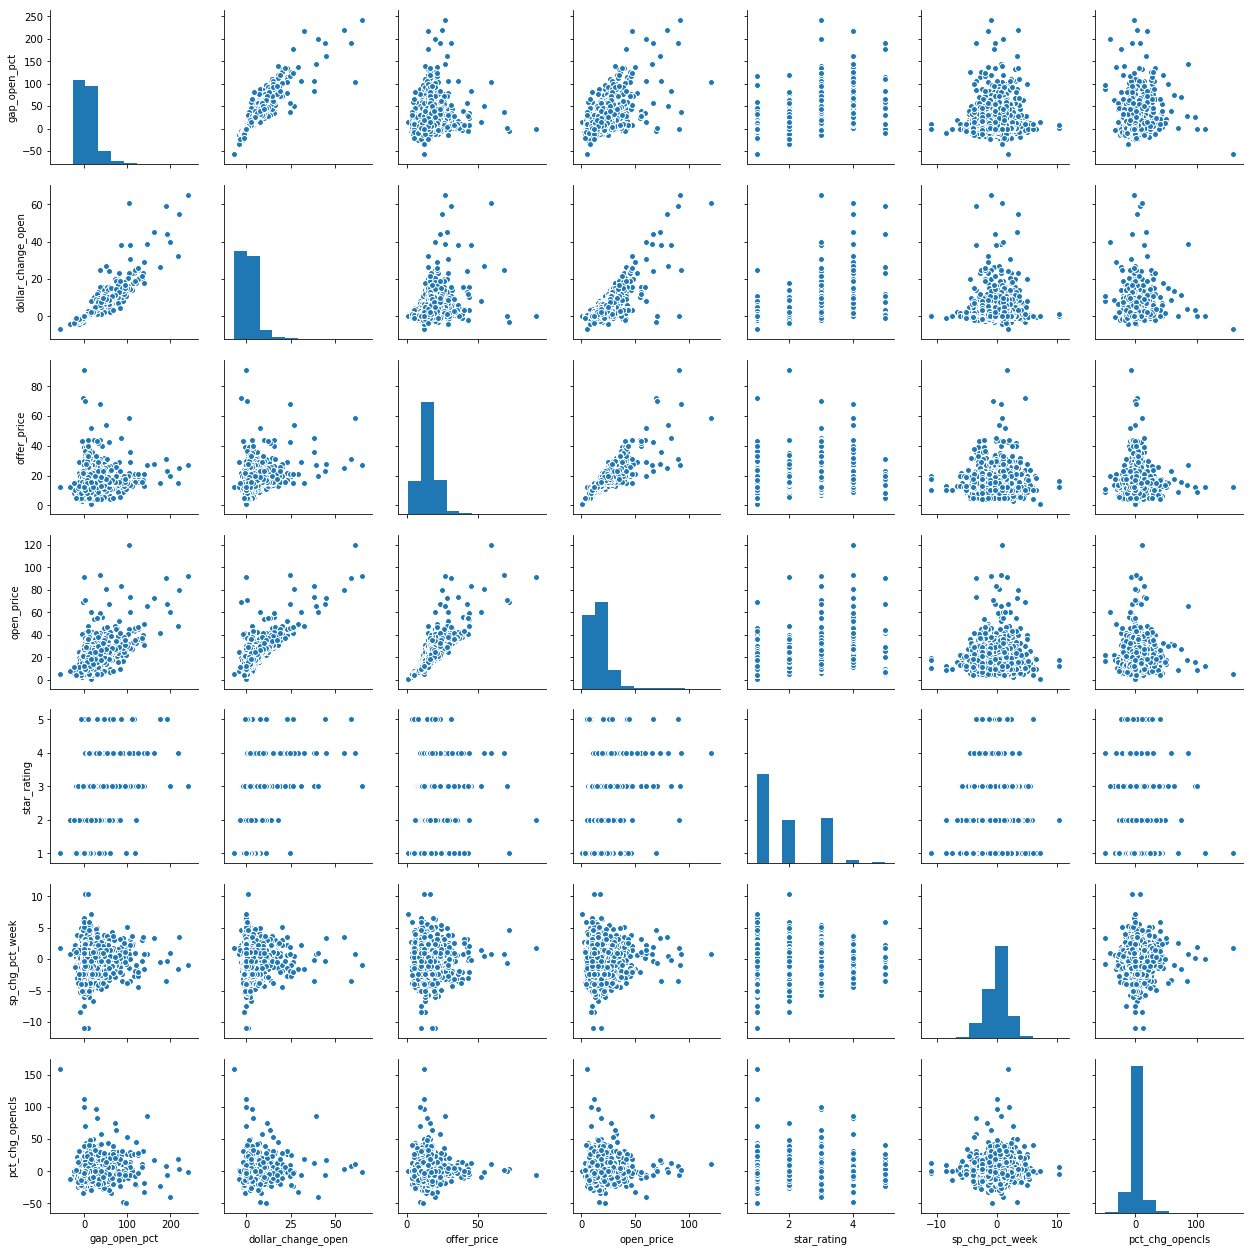

In [213]:
sns.pairplot(data=df[features_list])

In [214]:
df[features_list].corr()

,gap_open_pct,dollar_change_open,offer_price,open_price,star_rating,sp_chg_pct_week,pct_chg_opencls
gap_open_pct,1.000000,0.922376,0.234492,0.625786,0.552827,0.046997,0.071590
dollar_change_open,0.922376,1.000000,0.380965,0.766489,0.528259,0.035205,0.076116
offer_price,0.234492,0.380965,1.000000,0.885830,0.416653,-0.017665,0.012794
open_price,0.625786,0.766489,0.885830,1.000000,0.554533,0.005397,0.047086
star_rating,0.552827,0.528259,0.416653,0.554533,1.000000,-0.008800,0.087924
sp_chg_pct_week,0.046997,0.035205,-0.017665,0.005397,-0.008800,1.000000,0.011977
pct_chg_opencls,0.071590,0.076116,0.012794,0.047086,0.087924,0.011977,1.000000


In [215]:
features_list_culled = ['month', 'day','offer_price','gap_open_pct','star_rating','sp_chg_pct_week', 'pct_chg_opencls']

In [216]:
X = pd.get_dummies(df[features_list_culled], drop_first = True)

In [217]:
#use a time-based split into train, test (past predicts future)
y = X.pct_chg_opencls
X = X.drop('pct_chg_opencls', axis = 1)

X_train, X_test = X[:2500], X[2500:]

In [218]:
#turn into binary classification model
#boundary = 1% IPO stock price increase measured from open to close
y = y.map(lambda x: 1 if x >= 1.0 else 0)

#use a time-based split into train, test (past predicts future)
y_train = y[:2500]
y_test = y[2500:]

In [219]:
y.value_counts()

0    1872
1    1251
Name: pct_chg_opencls, dtype: int64

In [220]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [221]:
#model precision = 43%
#clf.score(X_test, y_test)
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

          0       0.65      0.88      0.75       401
          1       0.43      0.16      0.23       222

avg / total       0.57      0.62      0.57       623



In [222]:
confusion_matrix(y_test, y_pred)

array([[354,  47],
       [187,  35]], dtype=int64)

In [223]:
#fitted coefficients
baseline_coeff = clf.coef_
print(baseline_coeff)

[[-0.00465464  0.00457164  0.24380748 -0.00564964  0.18544533  0.14416022
   0.04058651 -0.24694459 -0.10654479 -0.17081018 -0.11414151 -0.16618461
  -0.16714527 -0.17574824 -0.19060169  0.07246794 -0.0560945   0.10170591]]


### KNN Classifier

In [224]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline 

In [225]:
#do grid search to find best n_neighbors for knn
params = {'n_neighbors':[9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]}
#--> the n_neighbors we'll search over

In [226]:
#Check the list of available parameters
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [227]:
#most suitable score in the grid search for this project = precision
#use 5 CV folds
grid = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, scoring='precision')

In [228]:
#fit model
#looks like n_neighbors 31 is best
grid.fit(X_train, y_train) 
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')

In [229]:
#predictions with best n_neighbors
best = grid.best_estimator_
y_pred = best.predict(X_test)

In [230]:
#model precision = 44%
#clf.score(X_test, y_test)
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

          0       0.68      0.75      0.71       401
          1       0.44      0.36      0.40       222

avg / total       0.59      0.61      0.60       623



In [231]:
confusion_matrix(y_test, y_pred)

array([[299, 102],
       [142,  80]], dtype=int64)

### Regularized Logistic Regression 

In [232]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_curve

In [233]:
X.head()

,offer_price,gap_open_pct,star_rating,sp_chg_pct_week,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,day_thurs,day_tues,day_weds
date,,,,,,,,,,,,,,,,,,
2000-05-12,8.0,28.125000,2.0,-0.374697,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2000-05-18,11.0,0.272727,1.0,5.090497,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2000-05-18,12.0,-1.000000,1.0,5.090497,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2000-05-18,20.0,100.000000,3.0,5.090497,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2000-05-18,10.0,15.000000,2.0,5.090497,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [234]:
y.head()

date
2000-05-12    0
2000-05-18    0
2000-05-18    0
2000-05-18    1
2000-05-18    1
Name: pct_chg_opencls, dtype: int64

### Ridge Regression

In [235]:
#precision is our chosen score
#the best hyperparameter 'C' is selected by the cross-validator 
clf = LogisticRegressionCV(scoring='precision', penalty='l2', cv=5, random_state=3001)

In [236]:
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=3001,
           refit=True, scoring='precision', solver='lbfgs', tol=0.0001,
           verbose=0)

In [237]:
clf.C_ #--> check the best 'C' param found during CV process

array([ 0.00599484])

In [238]:
y_pred = clf.predict(X_test)

In [239]:
#model precision = 48%
#clf.score(X_test, y_test)
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

          0       0.66      0.92      0.77       401
          1       0.48      0.13      0.20       222

avg / total       0.59      0.64      0.57       623



In [240]:
confusion_matrix(y_test, y_pred)

array([[369,  32],
       [193,  29]], dtype=int64)

In [241]:
#fitted coefficients
ridge_coeff = clf.coef_
print(ridge_coeff)

[[-0.00105835  0.00614507  0.1566297  -0.00407563  0.06572162  0.05139573
   0.02362994 -0.02332257 -0.00625165 -0.02461041 -0.00588204 -0.0235958
  -0.02614302 -0.03103238 -0.01879257  0.01830067 -0.03786674  0.03824127]]


#### Change the threshold, check precision score

In [242]:
precision, recall, thresholds = precision_recall_curve(y_test, clf.decision_function(X_test))

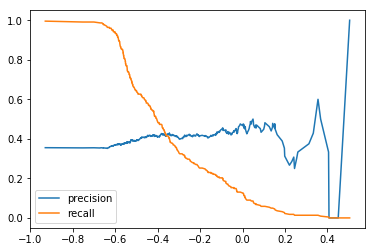

In [243]:
plt.plot(thresholds, precision[1:],  label = 'precision')
plt.plot(thresholds, recall[1:], label = 'recall')
plt.legend()

#### For balance between precision and recall, adjust the threshold accordingly
- check impact of changing threshold; the threshold determines how records are classified into the binary classes  
- exceeding the adjusted threshold results in predicting class1  
- threshold is defined in terms of "log odds", not probability

In [244]:
adj_thresh = clf.decision_function(X_test) > +0.35
#--> array of bool's (0 or 1), based on whether log odds are > or < threshold
#--> 0 = assign to class0, 1 = assign to class1

In [245]:
#check scores with adjusted threshold
print(classification_report(y_test, adj_thresh))

             precision    recall  f1-score   support

          0       0.65      0.99      0.78       401
          1       0.50      0.01      0.03       222

avg / total       0.59      0.64      0.51       623



#### Conclusion: do not raise the threshold, penalizes recall too much. Leave it at zero by default.

### Lasso Regression

In [246]:
#solver: ‘liblinear’ and ‘saga’ handle L1 penalty
clf = LogisticRegressionCV(scoring='precision', penalty='l1', cv=5, solver='liblinear', random_state=3001) 

In [247]:
clf.fit(X_train, y_train)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=3001,
           refit=True, scoring='precision', solver='liblinear', tol=0.0001,
           verbose=0)

In [248]:
clf.C_ #--> check the best 'C' param found during CV process

array([ 0.35938137])

In [249]:
y_pred = clf.predict(X_test)

In [250]:
#model precision = 46%
#clf.score(X_test, y_test)
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

          0       0.66      0.91      0.76       401
          1       0.46      0.14      0.22       222

avg / total       0.59      0.64      0.57       623



In [251]:
confusion_matrix(y_test, y_pred)

array([[364,  37],
       [190,  32]], dtype=int64)

In [252]:
#fitted coefficients
lasso_coeff = clf.coef_
print(lasso_coeff)

[[-0.00534785  0.00484589  0.22506365 -0.00335463  0.24912222  0.20183294
   0.09046539 -0.02512584  0.         -0.01299961  0.         -0.00371405
  -0.01365799 -0.0243882   0.          0.01056464 -0.07691652  0.04943382]]


### Plot the regularized coefficients

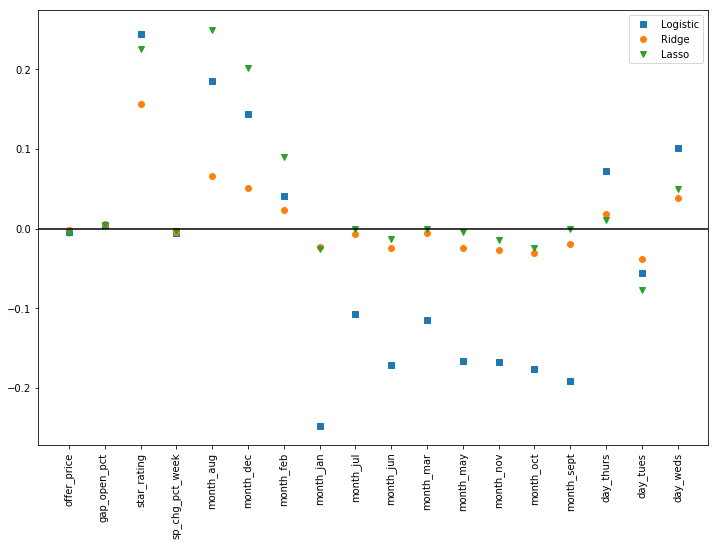

In [263]:
#regularization shrinks fitted coeff's

nr_feat = len(X_train.columns)

plt.figure(figsize = (12, 8))
plt.plot(baseline_coeff.T, 's', label = 'Logistic')
plt.plot(ridge_coeff.T, 'o', label = 'Ridge')
plt.plot(lasso_coeff.T, 'v', label = 'Lasso')
plt.xticks(np.arange(nr_feat),X_train.columns, rotation = 90)
plt.axhline(color = 'black')
plt.legend()

### Results: unable to achieve precision score > 50%. The IPO market is efficient or the features are not predictive.
- baseline logistic precision = 43%  
- baseline2 logistic precision = 43%  
- KNN precision = 44%  
- Ridge unscaled precision = 48%
- Lasso unscaled precision = 46%

### TODO:
- scale the numerical features in X, before applying regularized methods
- numeric features: offer_price, gap_open_pct, sp_chg_pct_week
- how do we apply scaling only to numeric features? (omitting categorical features)